## Import Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
df=pd.read_csv("C:\\Users\\nikie\\Downloads\\SMSSpamCollection.txt",sep='\t',header=None,names=['Label','SMS'])

In [3]:
df.shape

(5572, 2)

In [4]:
df.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
(df["Label"]=="ham").value_counts()

Label
True     4825
False     747
Name: count, dtype: int64

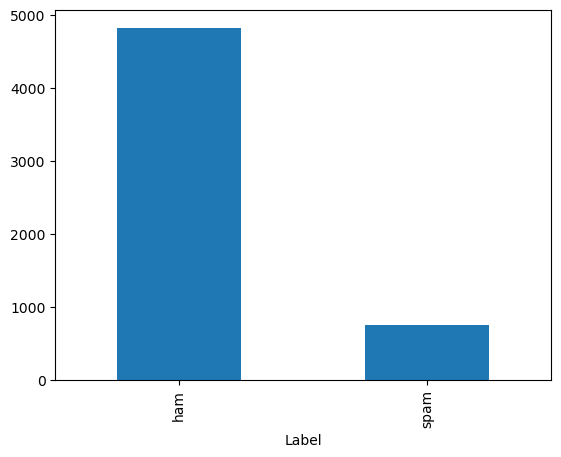

In [6]:
## Class Imbalance
df["Label"].value_counts().plot(kind="bar")
plt.show()

In [7]:
#Randomise
randomised_df=df.sample(frac=1,random_state=1)
randomised_df

,Label,SMS
1078,ham,"Yep, by the pretty sculpture"
4028,ham,"Yes, princess. Are you going to make me moan?"
958,ham,Welp apparently he retired
4642,ham,Havent.
4674,ham,I forgot 2 ask ü all smth.. There's a card on ...
...,...,...
905,ham,"We're all getting worried over here, derek and..."
5192,ham,Oh oh... Den muz change plan liao... Go back h...
3980,ham,CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...
235,spam,Text & meet someone sexy today. U can find a d...


In [8]:
randomised_df.Label=(randomised_df.Label=="spam").astype(int)

In [9]:
data_train,data_test=train_test_split(randomised_df,test_size=0.2,random_state=1)

In [10]:
y_train=data_train["Label"]
y_test=data_test["Label"]

In [11]:
del data_train["Label"]
del data_test["Label"]

In [12]:
data_train=data_train.reset_index(drop=True)
data_train.shape

(4457, 1)

In [13]:
data_test=data_test.reset_index(drop=True)
data_test.shape

(1115, 1)

In [14]:
data_train.head()

,SMS
0,URGENT! We are trying to contact U. Todays dra...
1,1 I don't have her number and 2 its gonna be a...
2,"Party's at my place at usf, no charge (but if ..."
3,Mm not entirely sure i understood that text bu...
4,Yes we are chatting too.


In [15]:
data_test.head()

,SMS
0,Good night my dear.. Sleepwell&amp;Take care
1,Sen told that he is going to join his uncle fi...
2,Thank you baby! I cant wait to taste the real ...
3,When can ü come out?
4,No. Thank you. You've been wonderful


In [16]:
## Remove punctuatuions form sms
data_train["SMS"]=data_train["SMS"].replace("\W", " ", regex=True)
data_test["SMS"]=data_test["SMS"].replace("\W", " ", regex=True)

In [17]:
# transform letter to lower case
data_train["SMS"]=data_train["SMS"].str.lower()
data_test["SMS"]=data_test["SMS"].str.lower()

In [18]:
data_train.head()

,SMS
0,urgent we are trying to contact u todays dra...
1,1 i don t have her number and 2 its gonna be a...
2,party s at my place at usf no charge but if ...
3,mm not entirely sure i understood that text bu...
4,yes we are chatting too


In [19]:
data_test.head()

,SMS
0,good night my dear sleepwell amp take care
1,sen told that he is going to join his uncle fi...
2,thank you baby i cant wait to taste the real ...
3,when can ü come out
4,no thank you you ve been wonderful


In [20]:
vectorizer = CountVectorizer()
X_train_encoded = vectorizer.fit_transform(data_train['SMS'])
X_test_encoded = vectorizer.transform(data_test['SMS'])

In [21]:
nb_model = MultinomialNB()
nb_model.fit(X_train_encoded, y_train)
y_pred = nb_model.predict_proba(X_test_encoded)[:, 1]

In [22]:
accuracy = nb_model.score(X_test_encoded, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9865470852017937


In [23]:
def classify_sms(message):
    #data = re.sub('\W', ' ', message)
    message = message.lower()
    message_list = [message]  
    X_test_encoded = vectorizer.transform(message_list)  
    prediction = nb_model.predict_proba(X_test_encoded)[:, 1]
    print("Spam probability",prediction)
    if prediction >= 0.5:
        print("The SMS is classified as spam.")
    else:
        print("The SMS is classified as non-spam.")

In [24]:
classify_sms("click this link to win secret money")

Spam probability [0.97629792]
The SMS is classified as spam.


In [25]:
classify_sms("WINNER!! This is the secret code to unlock the money: C3421.")

Spam probability [0.98325318]
The SMS is classified as spam.


In [26]:
classify_sms("Good morning dear, how was your night")

Spam probability [1.18865938e-06]
The SMS is classified as non-spam.


In [27]:
classify_sms("Nigeria is a great country")

Spam probability [0.03972093]
The SMS is classified as non-spam.


In [28]:
classify_sms("[ATT MESSAGE CENTER] Message blocked. You will be charged $01 for this notification.")

Spam probability [0.66418629]
The SMS is classified as spam.


In [29]:
classify_sms("i am not a scammer")

Spam probability [0.00323187]
The SMS is classified as non-spam.


Save Model

In [30]:
import pickle

In [31]:
filename="Spam_Model.sav"
pickle.dump(nb_model,open(filename,'wb'))

In [32]:
load_model=pickle.load(open('Spam_Model.sav',"rb"))

In [33]:
with open('Spam_Model.sav', 'wb') as model_file:
    pickle.dump(nb_model, model_file)

with open('Vectorizer.sav', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

y_pred = nb_model.predict_proba(X_test_encoded)[:, 1]
accuracy = nb_model.score(X_test_encoded, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9865470852017937
